In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
from tensorflow.keras import layers
import keras_tuner as kt
print("All good")

2.20.0
All good


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('/Users/donavanrooi/Desktop/Data Science/Datasets/diabetes_012_health_indicators_BRFSS2015.csv')

# EDA

In [4]:
# Display the first few rows of the dataset
print(df.head())

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

In [5]:
# Get a summary of the dataset, including data types and non-null counts
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
# Get basic statistics for numerical features
print(df.describe())

        Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000  

In [7]:
# Check for missing values in the dataset
print(df.isnull().sum())

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [8]:
# Display the distribution of the target variable 'Diabetes_012'
print(df['Diabetes_012'].value_counts())

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64


# The class distribution is imbalanced

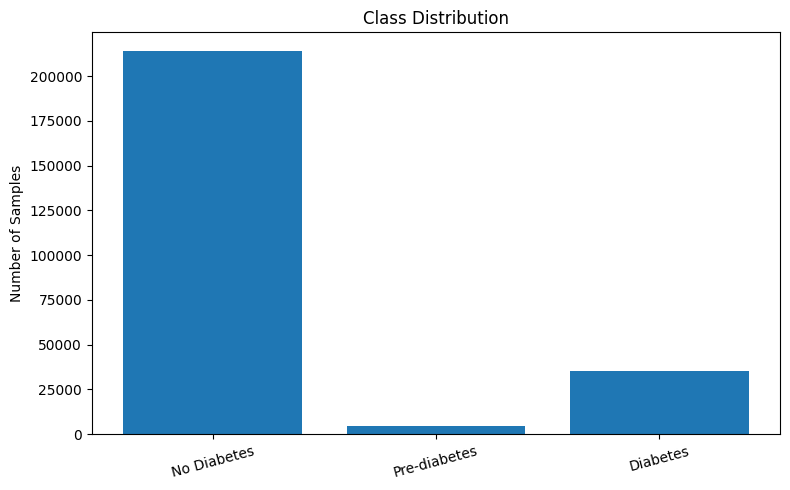

In [9]:
#Bar graph to show imbalance

import seaborn as sns
import matplotlib.pyplot as plt

counts = np.array([213703, 4631, 35346])
classes = ['No Diabetes', 'Pre-diabetes', 'Diabetes']

plt.figure(figsize=(8, 5))
plt.bar(classes, counts)
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Data preprocessing

In [10]:
# Separate features (X) and target variable (y)
# here the least informative features are already removed, they were identified using LASSO
X = df.drop(['Diabetes_012', "Fruits", "Veggies", "PhysActivity", "AnyHealthcare", "NoDocbcCost", "MentHlth", "PhysHlth", "Smoker"], axis=1)
y = df['Diabetes_012']

In [11]:
X

,HighBP,HighChol,CholCheck,BMI,Stroke,HeartDiseaseorAttack,HvyAlcoholConsump,GenHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,0.0,0.0,0.0,5.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,0.0,0.0,0.0,3.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,5.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,2.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,2.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,45.0,0.0,0.0,0.0,3.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,18.0,0.0,0.0,0.0,4.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,5.0,2.0
253678,1.0,0.0,1.0,23.0,0.0,0.0,0.0,3.0,0.0,1.0,7.0,5.0,1.0


In [12]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
253675    0.0
253676    2.0
253677    0.0
253678    0.0
253679    2.0
Name: Diabetes_012, Length: 253680, dtype: float64

In [13]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#The dataset is split into training and testing sets, with 20% of the data reserved for testing and 80% for training, 
# while random_state=42 ensures the split is reproducible each time the code is executed.

In [14]:
# Convert data to NumPy arrays to ensure compatibility with tensorflow
X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_train = np.array(y_train, dtype=np.int32)
y_test = np.array(y_test, dtype=np.int32)

In [15]:
# Feature Engineering: Least informative features identification

In [16]:
#lasso1 = Lasso(alpha=0.01, random_state=17)
#lasso1.fit(X_train, y_train)

In [17]:
#lasso1_coef = pd.DataFrame(
 #   {"coef": lasso1.coef_, "coef_abs": np.abs(lasso1.coef_)},
  #  index=df.columns.drop("Diabetes_012"),
#)
#lasso1_coef.sort_values(by="coef_abs", ascending=False)

In [18]:
# The identified features for removal are Fruits, Veggies, PhysActivity, AnyHealthCare, NoDocbcCost, MentHlth, PhysHlth, Smoker

In [19]:
# Scale numeric features only, this is also called z-standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# This process ensures that both the training and test datasets are standardized, meaning the features across both sets have similar scales. Each feature is adjusted so that its values are centered around zero and scaled to have a consistent spread, 
# resulting in a zero mean and a variance of one.

# Hyperparameter Tuning 

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras_tuner import RandomSearch

In [21]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(13,)))

    # Tune number of hidden layers
    for i in range(hp.Int('num_layers', min_value=1, max_value=3)):
        model.add(
            layers.Dense(
                units=hp.Int(f'units_{i}', min_value=64, max_value=512, step=64),
                activation='relu'
            )
        )

    model.add(layers.Dense(3, activation='softmax'))

    # Tune learning rate
    lr = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [22]:
from keras_tuner import RandomSearch

In [38]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=15,          # enough for large dataset
    executions_per_trial=1,
    directory='tuner_dir',
    project_name='nn_13f_3c_28Dec'
)

In [39]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.array([0, 1, 2]),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

In [40]:
# Search
tuner.search(
    X_train_scaled,
    y_train,
    epochs=10,              # short for tuning
    batch_size=64,
    validation_data=(X_test_scaled, y_test),
    class_weight=class_weights,
    verbose=1
)

Trial 14 Complete [00h 00m 18s]
val_accuracy: 0.6575213074684143

Best val_accuracy So Far: 0.7200607061386108
Total elapsed time: 00h 06m 57s

Search: Running Trial #15

Value             |Best Value So Far |Hyperparameter
3                 |2                 |num_layers
256               |192               |units_0
0.001             |0.01              |learning_rate
384               |192               |units_1
192               |384               |units_2

Epoch 1/10
3171/3171 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6138 - loss: 0.9588 - val_accuracy: 0.6274 - val_loss: 0.8986
Epoch 2/10
 276/3171 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5729 - loss: 1.0050

KeyboardInterrupt: 

In [26]:
best_hp = tuner.get_best_hyperparameters(1)[0]

print("Best number of layers:", best_hp.get('num_layers'))
for i in range(best_hp.get('num_layers')):
    print(f"Units in layer {i}:", best_hp.get(f'units_{i}'))
print("Best learning rate:", best_hp.get('learning_rate'))

Best number of layers: 3
Units in layer 0: 192
Units in layer 1: 320
Units in layer 2: 320
Best learning rate: 0.01


In [27]:
best_model = tuner.get_best_models(1)[0]

history = best_model.fit(
    X_train_scaled,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_test_scaled, y_test),
    class_weight=class_weights,
    callbacks=[
        keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ],
    verbose=1
)

Epoch 1/50


/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


3171/3171 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.5979 - loss: 0.9673 - val_accuracy: 0.5236 - val_loss: 0.9478
Epoch 2/50
3171/3171 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5898 - loss: 0.9663 - val_accuracy: 0.5558 - val_loss: 0.9660
Epoch 3/50
3171/3171 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5919 - loss: 0.9637 - val_accuracy: 0.6006 - val_loss: 0.8754
Epoch 4/50
3171/3171 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5891 - loss: 0.9696 - val_accuracy: 0.4819 - val_loss: 1.0309
Epoch 5/50
3171/3171 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5898 - loss: 0.9701 - val_accuracy: 0.6707 - val_loss: 0.7690
Epoch 6/50
3171/3171 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5880 - loss: 0.9631 - val_accuracy: 0.6288 - val_loss: 0.8236
Epoch 7/50
3171/3171 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5834 - loss: 0.9640 - val_accuracy: 0.6610 - val_loss: 0.8289
Epoch 8/50
3171/3171 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5838 - loss: 0.9638 - val_accurac

In [28]:
# Display Model Summary
print("Model Summary:")
best_model.summary()

Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 192)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 320)            │        61,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 320)            │       102,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           963 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 504,395 (1.92 MB)

 Trainable params: 168,131 (656.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 336,264 (1.28 MB)

In [29]:
# 6. Evaluate the model
loss, accuracy = best_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Test Loss: 0.7507957220077515
Test Accuracy: 0.6824345588684082


# Evaluation Metrics

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report

In [31]:
# 1. Make predictions
predictions = best_model.predict(X_test_scaled)

1586/1586 ━━━━━━━━━━━━━━━━━━━━ 1s 453us/step


In [1]:
# 2. Convert probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)


NameError: name 'np' is not defined

In [33]:
labels = [0, 1, 2]

print(classification_report(
    y_test,
    predicted_labels,
    labels=labels,
    target_names=['No Diabetes', 'Pre-diabetes', 'Diabetes']
))

              precision    recall  f1-score   support

 No Diabetes       0.95      0.71      0.81     42741
Pre-diabetes       0.03      0.28      0.05       926
    Diabetes       0.40      0.55      0.46      7069

    accuracy                           0.68     50736
   macro avg       0.46      0.51      0.44     50736
weighted avg       0.85      0.68      0.75     50736



In [34]:
print(f'Accuracy: {accuracy:.2f}')
# print(f'Precision: {precision:.2f}')
# print(f'Recall: {recall:.2f}')
# print(f'F1 Score: {f1:.2f}')

Accuracy: 0.68


In [35]:
np.unique(y_test)
np.unique(predicted_labels)

array([0, 1, 2])

<Axes: >

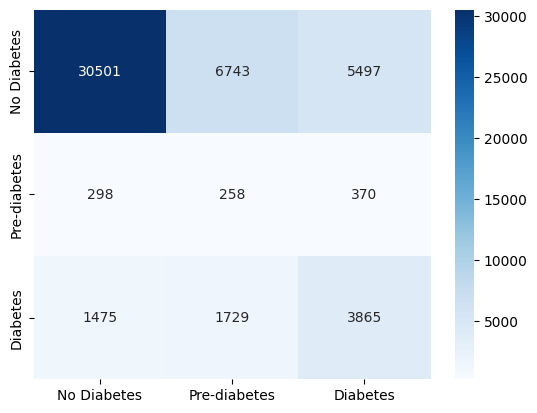

In [36]:
class_names = ['No Diabetes', 'Pre-diabetes', 'Diabetes']

cm = confusion_matrix(y_test, predicted_labels, labels=labels)

sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
)

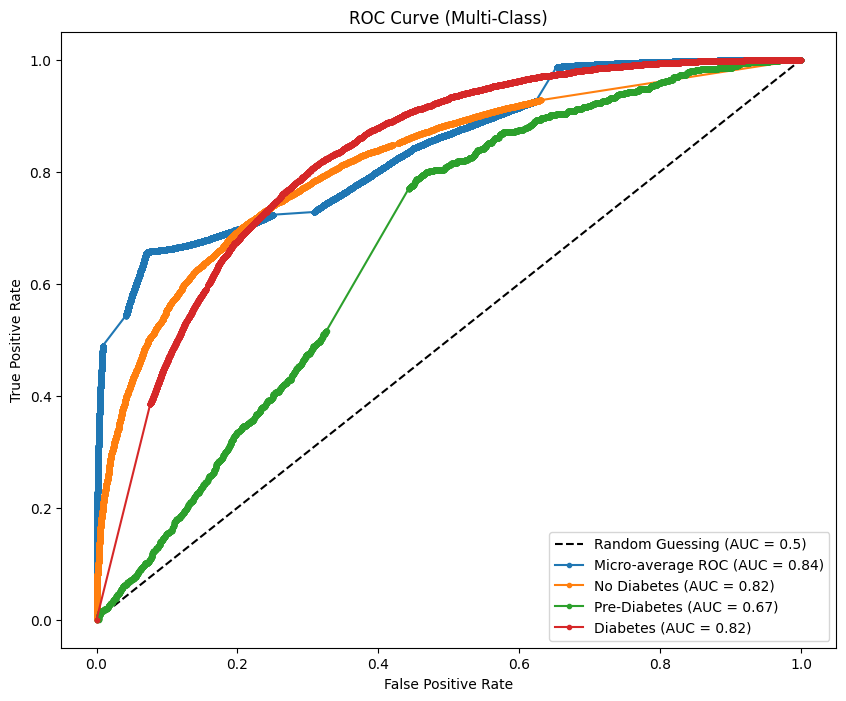

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc

# y_test contains the true class labels and you have class names
class_names = ['No Diabetes', 'Pre-Diabetes', 'Diabetes']

n_classes = len(class_names)

# Convert y_test to binary format
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Initialize lists to store ROC values
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Plot ROC Curve
plt.figure(figsize=(10, 8))

# Plot random guessing line (diagonal line)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC = 0.5)')

# Plot micro-average ROC
plt.plot(fpr["micro"], tpr["micro"], marker='.', label='Micro-average ROC (AUC = {:.2f})'.format(roc_auc["micro"]))

# Plot ROC for each class with custom labels
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], marker='.', label='{} (AUC = {:.2f})'.format(class_names[i], roc_auc[i]))

plt.title('ROC Curve (Multi-Class)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()